In [2]:
import pandas as pd

In [16]:
crosswalk = pd.read_csv('https://raw.githubusercontent.com/HiddenS1/Newsroom/main/data/Crosswalk_Record_Description_for_NIBRS_Estimation_2021_Indicator_Files.csv')

In [17]:
crosswalk = crosswalk.iloc[56:107,:]

In [32]:
crosswalk['State'] = crosswalk['Unnamed: 1'].apply(lambda x: x.split(' -')[0])

In [33]:
crosswalk

,"Crosswalk for the NIBRS Estimates, 2021, Indicator Files",Unnamed: 1,State
56,Indicator_Tables_56.csv,Alabama - All Agencies,Alabama
57,Indicator_Tables_57.csv,Alaska - All Agencies,Alaska
58,Indicator_Tables_58.csv,Arizona - All Agencies,Arizona
59,Indicator_Tables_59.csv,Arkansas - All Agencies,Arkansas
60,Indicator_Tables_60.csv,California - All Agencies,California
61,Indicator_Tables_61.csv,Colorado - All Agencies,Colorado
62,Indicator_Tables_62.csv,Connecticut - All Agencies,Connecticut
63,Indicator_Tables_63.csv,Delaware - All Agencies,Delaware
64,Indicator_Tables_64.csv,District of Columbia - All Agencies,District of Columbia
65,Indicator_Tables_65.csv,Florida - All Agencies,Florida


In [215]:
# Get the bias of NIBRS estimation by state
df = []
for i in range(crosswalk.shape[0]):
    place = i+56
    name = 'D:/temp/Columbia/newsroom/Marshall/Indicator_Tables_no_supp_no_LEOKA/Indicator_Tables_no_supp_no_LEOKA_'+ str(place) + '.csv'
    df_nys_estimation = pd.read_csv(name)
    if df_nys_estimation.shape[0]==0:
        row = {
            'State': crosswalk.iloc[i,2],
            'Rape': 0,
            'Violent Total': 0,
            'Burglary': 0,
            'Larceny': 0,
            'Property Total': 0,
            'Index Total': 0
        }
        df.append(row)
        continue
    df_nys_estimation_index_crime = df_nys_estimation[df_nys_estimation["indicator_name"].isin(["Violent Crime", "Property Crime",\
                                          "Murder and Non-negligent Manslaughter", "Rape", "Robbery", "Aggravated Assault",\
                                          "Burglary/B&E", "Larceny/Theft Offenses", "Motor Vehicle Theft"])]
    df_nys_estimation_index_crime_summary = df_nys_estimation_index_crime[(df_nys_estimation_index_crime["estimate_type"] == "count") &\
                              (df_nys_estimation_index_crime["estimate_domain_1"] == "Offense count")]\
                              [["indicator_name", "estimate_bias"]]
    df_nys_estimation_index_crime_summary["indicator_name"] = df_nys_estimation_index_crime_summary["indicator_name"].replace({
                                  "Violent Crime": "Violent Total",
                                  "Burglary/B&E": "Burglary",
                                  "Larceny/Theft Offenses": "Larceny",
                                  "Property Crime": "Property Total"
                              })
    df_nys_estimation_index_crime_summary = df_nys_estimation_index_crime_summary.rename(columns = {"indicator_name": "crime"})
    df_nys_estimation_index_crime_summary = df_nys_estimation_index_crime_summary.set_index("crime")
    df_nys_estimation_index_crime_summary.loc["Index Total", "estimate_bias"] = df_nys_estimation_index_crime_summary.loc["Violent Total", "estimate_bias"] + df_nys_estimation_index_crime_summary.loc["Property Total", "estimate_bias"]
    row = {
        'State': crosswalk.iloc[i,2],
        'Rape': df_nys_estimation_index_crime_summary.loc['Rape','estimate_bias'],
        'Violent Total': df_nys_estimation_index_crime_summary.loc['Violent Total','estimate_bias'],
        'Burglary': df_nys_estimation_index_crime_summary.loc['Burglary','estimate_bias'],
        'Larceny': df_nys_estimation_index_crime_summary.loc['Larceny','estimate_bias'],
        'Property Total': df_nys_estimation_index_crime_summary.loc['Property Total','estimate_bias'],
        'Index Total': df_nys_estimation_index_crime_summary.loc['Index Total','estimate_bias']
    }
    df.append(row)
df = pd.DataFrame(df)

In [228]:
df = df.set_index('State')

In [236]:
df_abs = df.assign(Violent_Total2=0, Property_Total2=0, Index_Total2=0)

In [242]:
df_abs = df_abs.abs()

In [225]:
self_est = pd.read_csv('https://raw.githubusercontent.com/HiddenS1/Newsroom/main/output_data/NIBRS_estimation.csv')
self_est['bias'] = self_est['nys_total'] - self_est['estimate']

In [226]:
self_est

,crime,estimate,estimate_unweighted,estimate_upper_bound,estimate_lower_bound,nys_total,unweighted_pct,estimate/total,bias
0,Index Total,161035.127193,57059.0,NaN,NaN,343357.0,0.166180,0.469002,182321.872807
1,Property Total,140832.311404,49595.0,223183.227308,58481.395499,267128.0,0.185660,0.527209,126295.688596
2,Larceny,114465.517544,39977.0,180474.092856,48456.942232,218129.0,0.183272,0.524761,103663.482456
3,Violent Total,20202.815789,7464.0,31513.366511,8892.265068,76229.0,0.097915,0.265028,56026.184211
4,Burglary,15523.881579,5406.0,24573.598267,6474.164891,27129.0,0.199270,0.572225,11605.118421
5,Rape,1420.530702,432.0,1958.666098,882.395306,6213.0,0.069532,0.228638,4792.469298
6,Murder,NaN,NaN,NaN,NaN,880.0,NaN,NaN,NaN
7,Robbery,NaN,NaN,NaN,NaN,18050.0,NaN,NaN,NaN
8,Aggravated Assault,NaN,NaN,NaN,NaN,51086.0,NaN,NaN,NaN
9,Motor Vehicle Theft,NaN,NaN,NaN,NaN,21870.0,NaN,NaN,NaN


In [250]:
diff = (self_est.set_index('crime').transpose().loc['bias',['Index Total','Violent Total','Property Total']]-df_abs.loc['New York',['Index Total','Violent Total','Property Total']]).tolist()
df_abs.loc['New York',['Index_Total2','Violent_Total2','Property_Total2']] = diff

In [251]:
df_abs

,Rape,Violent Total,Burglary,Larceny,Property Total,Index Total,Violent_Total2,Property_Total2,Index_Total2
State,,,,,,,,,
Alabama,123.817875,2821.326733,3058.593599,12264.588766,17084.527402,19905.854135,0.000000,0.000000,0.000000
Alaska,55.244074,136.781223,9.338470,115.580404,214.852814,78.071592,0.000000,0.000000,0.000000
Arizona,5.195338,473.746678,719.318336,5659.055472,6867.642507,7341.389185,0.000000,0.000000,0.000000
Arkansas,12.893621,67.992692,146.981932,520.477812,743.416914,811.409606,0.000000,0.000000,0.000000
California,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Colorado,10.041674,133.410123,27.053185,42.004435,92.458500,225.868623,0.000000,0.000000,0.000000
Connecticut,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Delaware,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
District of Columbia,1.223391,424.151389,1.974570,279.888955,303.351515,727.502904,0.000000,0.000000,0.000000


In [275]:
df1 = df_abs.sort_values('Violent Total')
df2 = df_abs.sort_values('Property Total')
df3 = df_abs.sort_values('Index Total')

In [295]:
df1 = df1.iloc[11:]
df2 = df2.iloc[11:]
df3 = df3.iloc[11:]

In [296]:
State = df1.index.tolist()
Violent_Total = df1['Violent Total'].tolist()
Property_Total = df2['Property Total'].tolist()
Index_Total = df3['Index Total'].tolist()

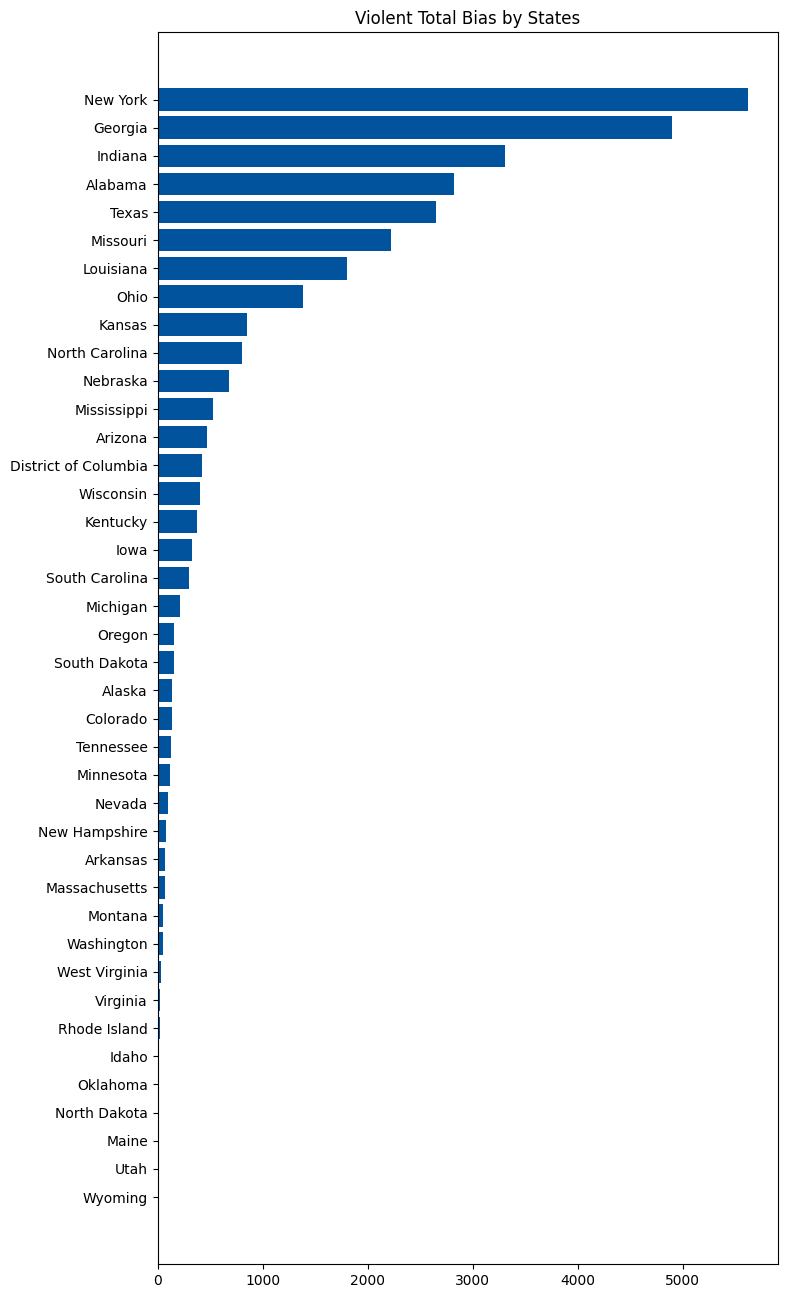

In [297]:
# Visualization
y=State
x=Violent_Total
plt.figure(figsize=(8, 16))
plt.barh(y, x, color="#00539CFF")
plt.title('Violent Total Bias by States')
plt.show()

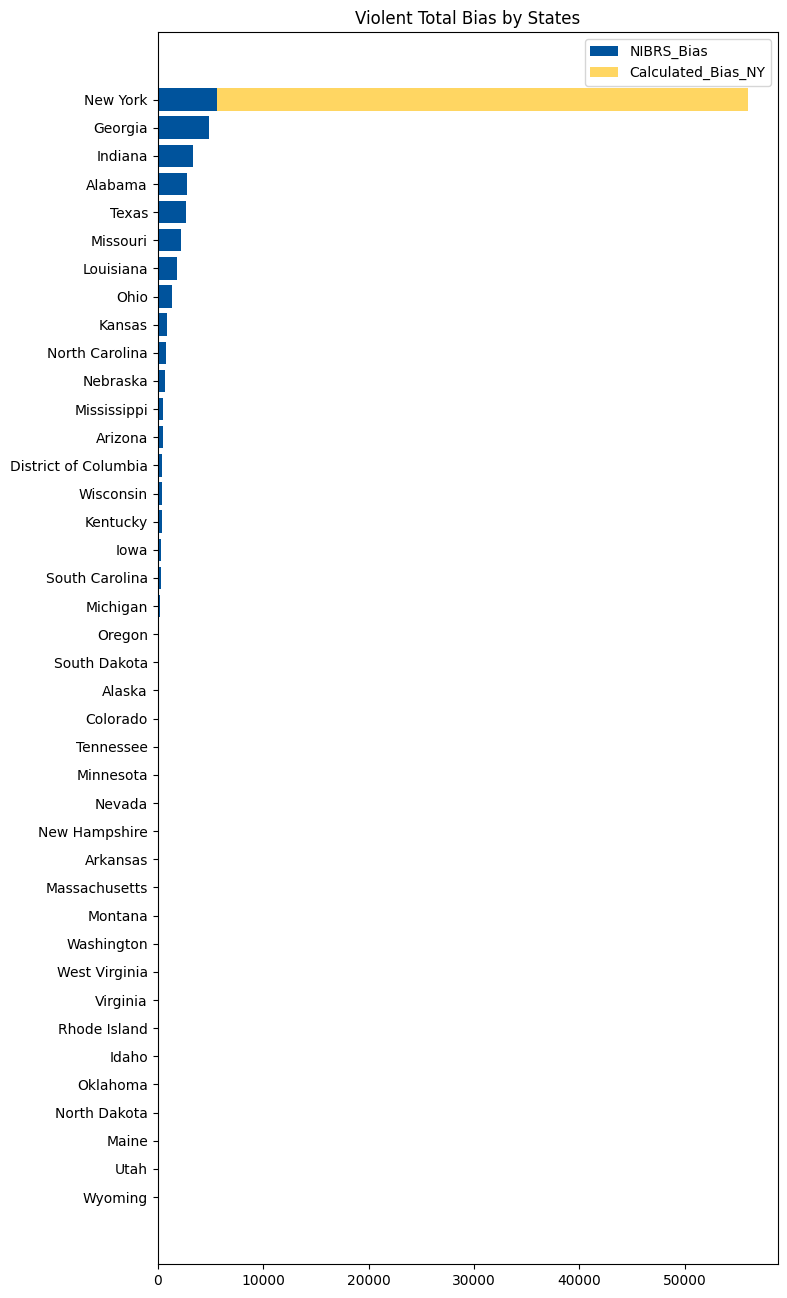

In [304]:
plt.figure(figsize=(8, 16))

State = df1.index.tolist()
NIBRS_Bias = df1['Violent Total'].tolist()
Calculated_Bias_NY = df1['Violent_Total2'].tolist()

b1 = plt.barh(State, NIBRS_Bias, color="#00539CFF")

b2 = plt.barh(State, Calculated_Bias_NY, left=NIBRS_Bias, color="#FFD662FF")

plt.title('Violent Total Bias by States')

plt.legend([b1, b2], ["NIBRS_Bias", "Calculated_Bias_NY"])

plt.show()

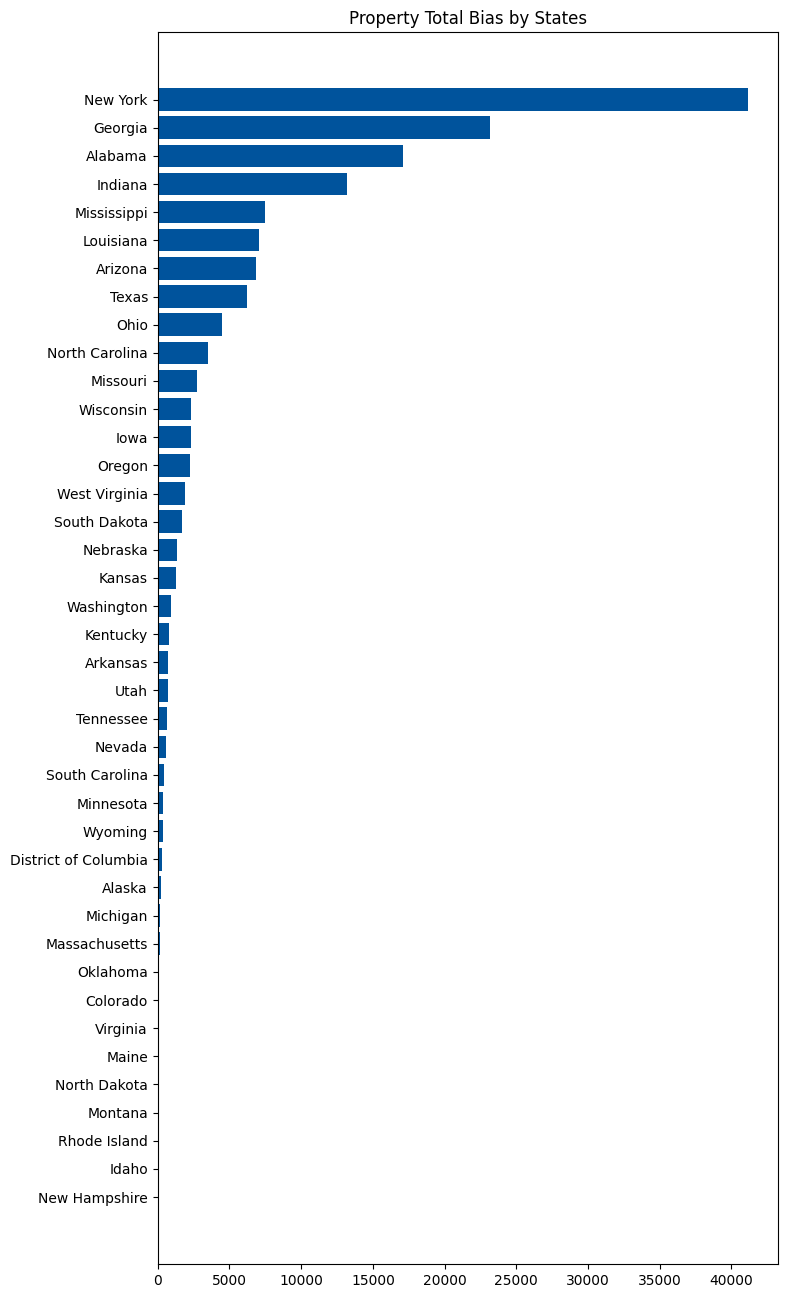

In [299]:
y=df2.index.tolist()
x=Property_Total
plt.figure(figsize=(8, 16))
plt.barh(y, x, color="#00539CFF")
plt.title('Property Total Bias by States')
plt.show()

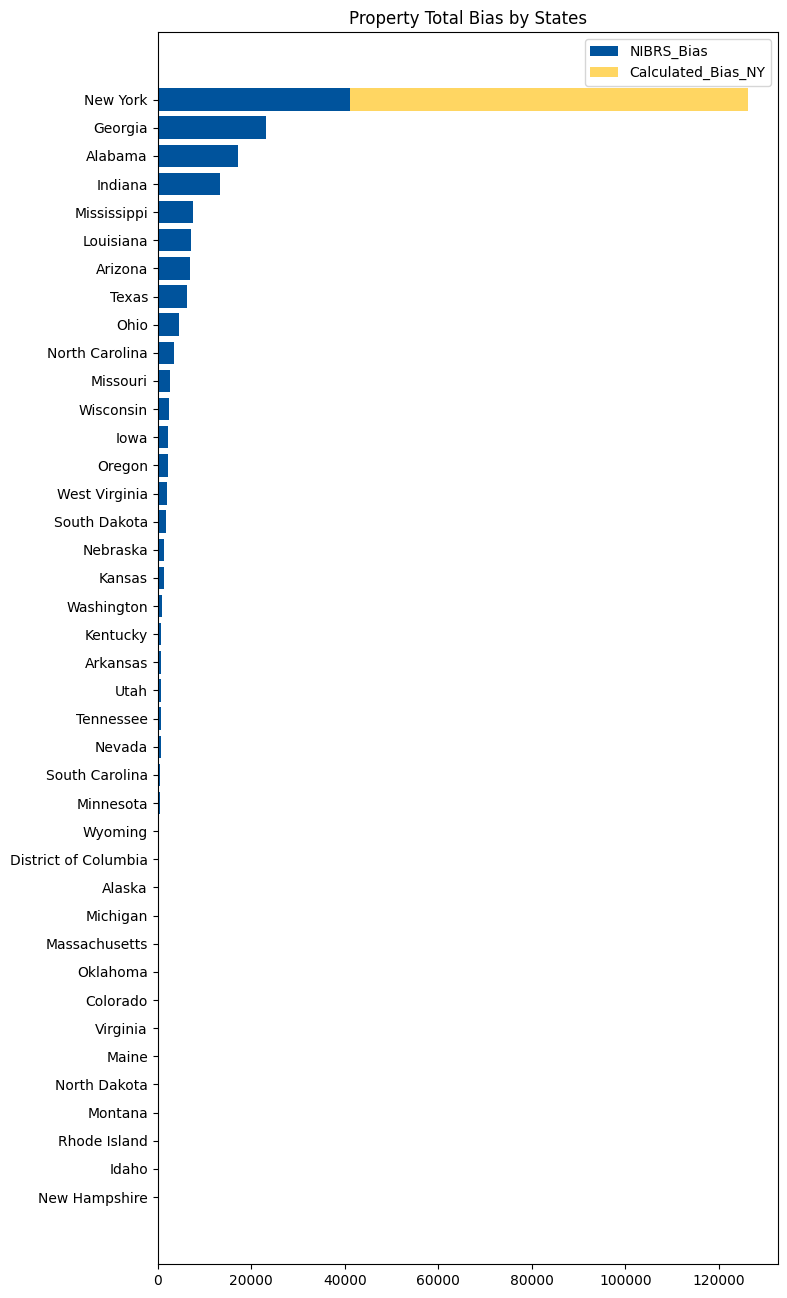

In [300]:
plt.figure(figsize=(8, 16))

State = df2.index.tolist()
NIBRS_Bias = df2['Property Total'].tolist()
Calculated_Bias_NY = df2['Property_Total2'].tolist()

b1 = plt.barh(State, NIBRS_Bias, color="#00539CFF")

b2 = plt.barh(State, Calculated_Bias_NY, left=NIBRS_Bias, color="#FFD662FF")

plt.title('Property Total Bias by States')

plt.legend([b1, b2], ["NIBRS_Bias", "Calculated_Bias_NY"])

plt.show()

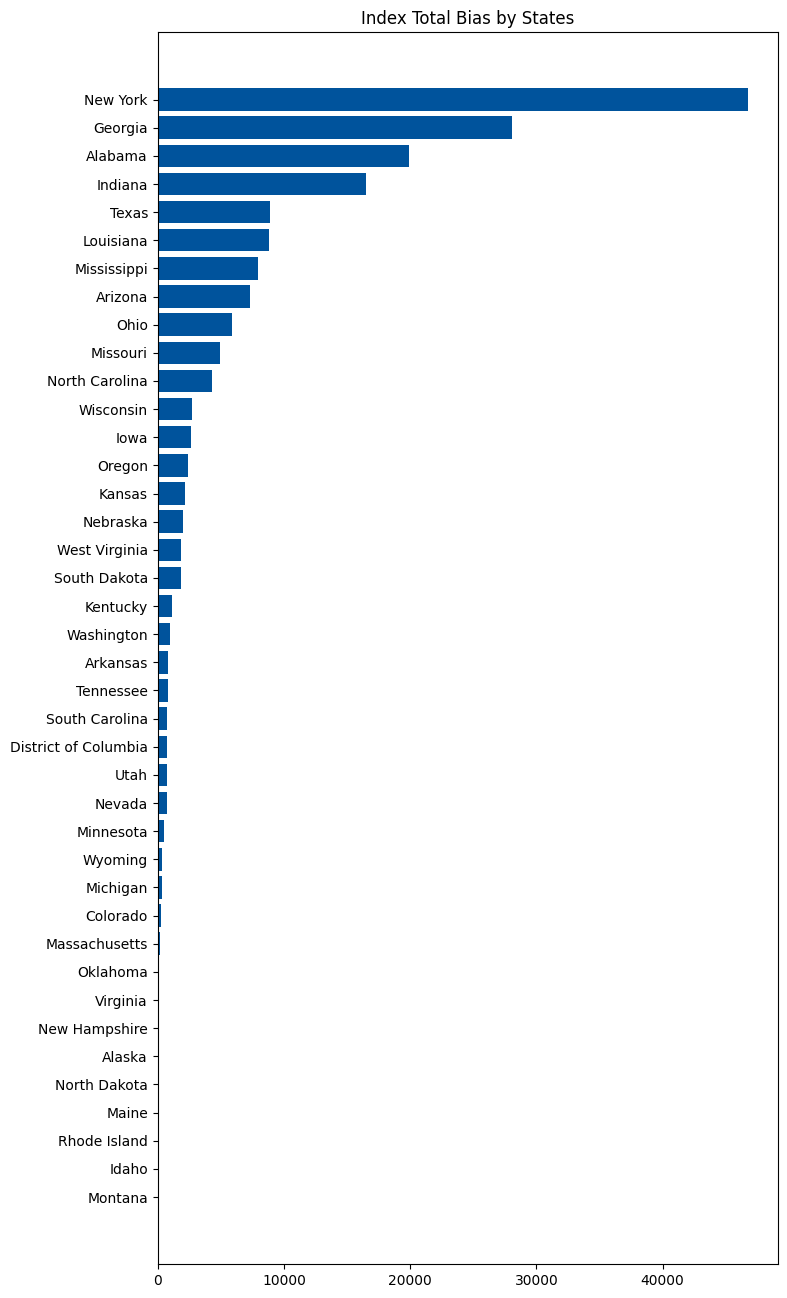

In [301]:
y=df3.index.tolist()
x=Index_Total
plt.figure(figsize=(8, 16))
plt.barh(y, x, color="#00539CFF")
plt.title('Index Total Bias by States')
plt.show()

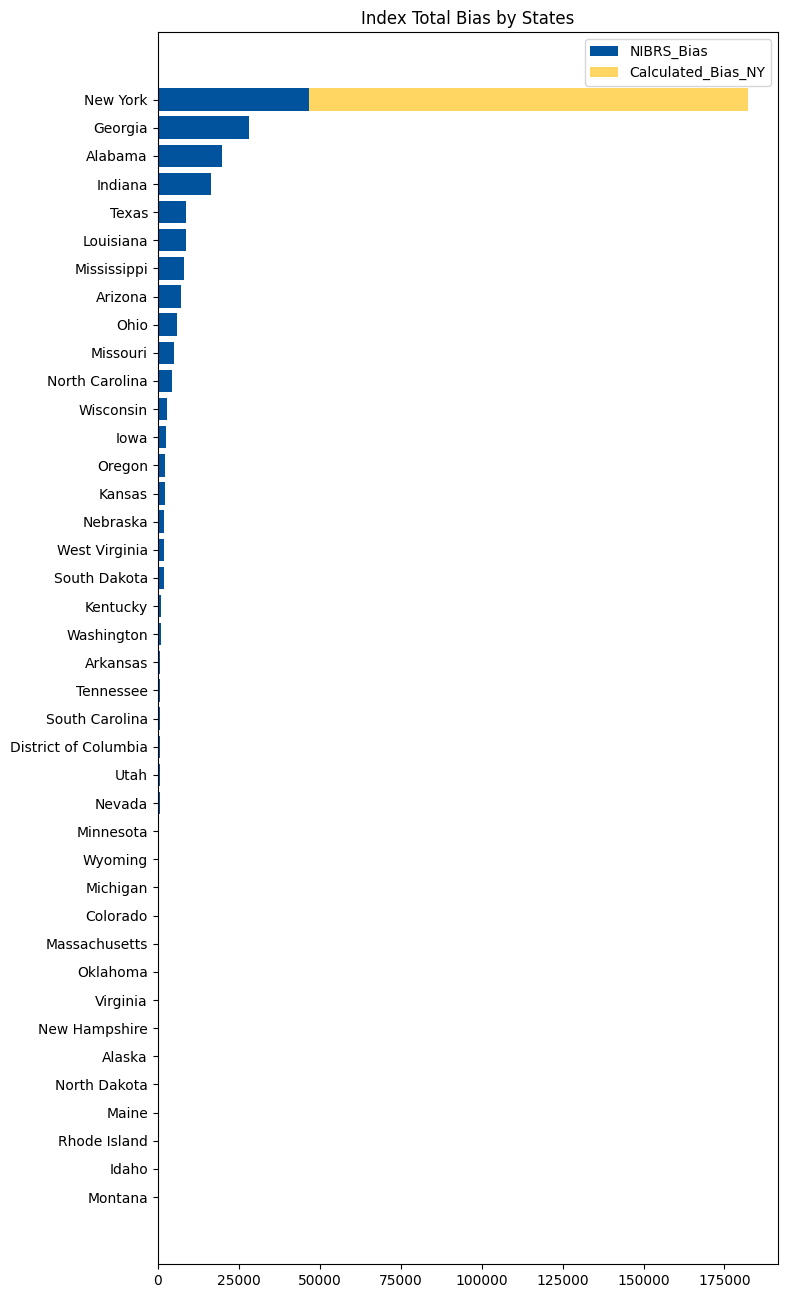

In [302]:
plt.figure(figsize=(8, 16))

State = df3.index.tolist()
NIBRS_Bias = df3['Index Total'].tolist()
Calculated_Bias_NY = df3['Index_Total2'].tolist()

b1 = plt.barh(State, NIBRS_Bias, color="#00539CFF")

b2 = plt.barh(State, Calculated_Bias_NY, left=NIBRS_Bias, color="#FFD662FF")

plt.title('Index Total Bias by States')

plt.legend([b1, b2], ["NIBRS_Bias", "Calculated_Bias_NY"])

plt.show()

In [217]:
#df.to_csv('D:/temp/Columbia/newsroom/Marshall/NIBRS_all_states.csv',index=False)

In [82]:
# Get SRS estimation
srs = pd.read_csv('https://raw.githubusercontent.com/HiddenS1/Newsroom/main/data/estimated_crimes_1979_2020.csv')

In [91]:
srsny = srs.loc[(srs.state_abbr=='NY')&(srs.year>=1990)]

In [101]:
srsny['index_total'] = srsny['property_crime'] + srsny['violent_crime']

C:\Users\28047\AppData\Local\Temp\ipykernel_43676\2415835707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  srsny['index_total'] = srsny['property_crime'] + srsny['violent_crime']


In [95]:
srsny.loc[srsny.year>2012,'rape_legacy'] = srsny.loc[srsny.year>2012,'rape_revised']

In [98]:
srsny.drop(['caveats','rape_revised'],axis=1,inplace=True)

C:\Users\28047\AppData\Local\Temp\ipykernel_43676\3485786346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  srsny.drop(['caveats','rape_revised'],axis=1,inplace=True)


In [103]:
srsny

,year,state_abbr,state_name,population,violent_crime,homicide,rape_legacy,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,index_total
607,1990,NY,New York,17990455,212458,2605,5368.0,112380,92105,932416,208813,536012,187591,1144874
659,1991,NY,New York,18058000,210184,2571,5085.0,112342,90186,917467,204499,531681,181287,1127651
711,1992,NY,New York,18119000,203311,2397,5152.0,108154,87608,858178,193548,495708,168922,1061489
763,1993,NY,New York,18197000,195352,2420,5008.0,102122,85802,814824,181709,481166,151949,1010176
815,1994,NY,New York,18169000,175433,2016,4700.0,86617,82100,745845,164650,452322,128873,921278
867,1995,NY,New York,18136000,152683,1550,4290.0,72492,74351,674342,146562,425184,102596,827025
919,1996,NY,New York,18185000,132206,1353,4174.0,61822,64857,619250,129828,399522,89900,751456
971,1997,NY,New York,18137000,124890,1093,4075.0,56094,63628,584438,118306,386435,79697,709328
1023,1998,NY,New York,18175000,115915,924,3843.0,49125,62023,536287,104821,363295,68171,652202
1075,1999,NY,New York,18196601,107147,903,3563.0,43821,58860,489596,93217,338118,58261,596743


In [117]:
srsest = []
for i in range(srsny.shape[0]):
    year = srsny.iloc[i,0]
    df = df_nys_data[(df_nys_data["Year"] == year) &\
            (df_nys_data["Agency"] == "County Total")][["Index Total", "Violent Total", "Property Total",\
             "Murder", "Rape", "Robbery", "Aggravated Assault",\
             "Burglary", "Larceny", "Motor Vehicle Theft"]].sum(axis=0)\
             .reset_index() \
             .rename(columns = {
                 "index": "crime",
                 0: "nys_total"
             })
    row = {
        'year': year,
        'Index Total': srsny.iloc[i,13]-df.iloc[0,1],
        'Violent Total': srsny.iloc[i,4]-df.iloc[1,1],
        'Property Total': srsny.iloc[i,9]-df.iloc[2,1],
        'Murder': srsny.iloc[i,5]-df.iloc[3,1],
        'Rape': srsny.iloc[i,6]-df.iloc[4,1],
        'Robbery': srsny.iloc[i,7]-df.iloc[5,1],
        'Aggravated Assault': srsny.iloc[i,8]-df.iloc[6,1],
        'Burglary': srsny.iloc[i,10]-df.iloc[7,1],
        'Larceny': srsny.iloc[i,11]-df.iloc[8,1], 
        'Motor Vehicle Theft': srsny.iloc[i,12]-df.iloc[9,1]
    }
    srsest.append(row)
srsest = pd.DataFrame(srsest2)

In [112]:
#SRS bias
srsest

,year,Index Total,Violent Total,Property Total,Murder,Rape,Robbery,Aggravated Assault,Burglary,Larceny,Motor Vehicle Theft
0,1990,7185.0,503.0,6682.0,-1.0,20.0,104.0,380.0,1475.0,4357.0,850.0
1,1991,1148.0,120.0,1028.0,14.0,2.0,4.0,100.0,543.0,522.0,-37.0
2,1992,2903.0,3146.0,-243.0,15.0,26.0,2521.0,584.0,1096.0,-1991.0,652.0
3,1993,-401.0,2761.0,-3162.0,34.0,32.0,2204.0,491.0,632.0,-3908.0,114.0
4,1994,2068.0,440.0,1628.0,36.0,1.0,68.0,335.0,760.0,670.0,198.0
5,1995,-539.0,952.0,-1491.0,-1.0,71.0,-24.0,906.0,-234.0,-1263.0,6.0
6,1996,293.0,278.0,15.0,23.0,15.0,-30.0,270.0,-137.0,65.0,87.0
7,1997,-19.0,-23.0,4.0,7.0,-10.0,-45.0,25.0,-778.0,825.0,-43.0
8,1998,3080.0,-59.0,3139.0,1.0,-94.0,-97.0,131.0,834.0,1863.0,442.0
9,1999,-6290.0,319.0,-6609.0,-12.0,127.0,-1247.0,1451.0,1708.0,-4377.0,-3940.0


In [177]:
srsest_sub = srsest.loc[:,['year','Index Total','Violent Total','Property Total']]

In [178]:
srsest_sub = srsest_sub.set_index('year')

In [179]:
# Add NIBRS estimation of 2021 to srsest_sub
srsest_sub.loc[2021,['Index Total','Violent Total','Property Total']] = self_est.set_index('crime').transpose().loc['bias',['Index Total','Violent Total','Property Total']]

In [180]:
srsest_sub

,Index Total,Violent Total,Property Total
year,,,
1990,7185.000000,503.000000,6682.000000
1991,1148.000000,120.000000,1028.000000
1992,2903.000000,3146.000000,-243.000000
1993,-401.000000,2761.000000,-3162.000000
1994,2068.000000,440.000000,1628.000000
1995,-539.000000,952.000000,-1491.000000
1996,293.000000,278.000000,15.000000
1997,-19.000000,-23.000000,4.000000
1998,3080.000000,-59.000000,3139.000000


In [213]:
#srsest.to_csv('D:/temp/Columbia/newsroom/Marshall/SRS_est.csv')

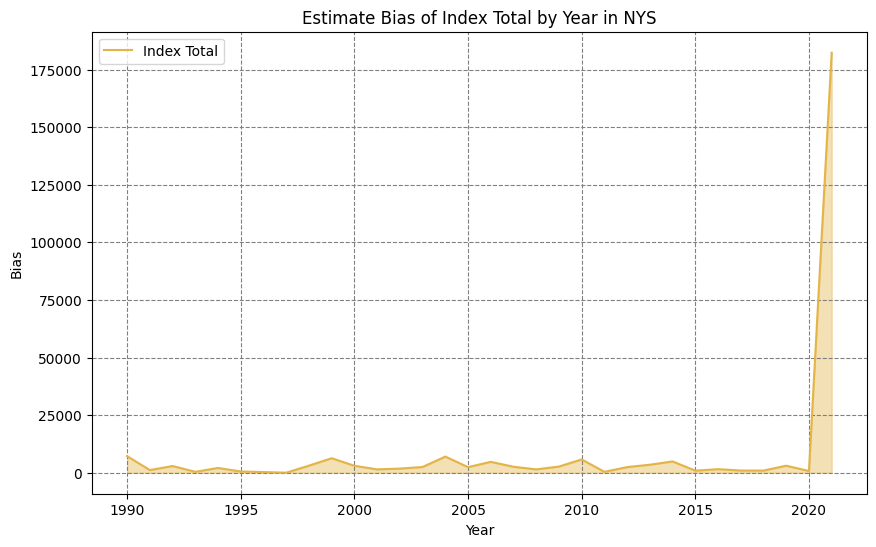

In [205]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.grid(color='gray', linestyle='--')

x = srsest_sub.index
y = srsest_sub['Index Total'].abs()

plt.plot(x, y, color='#E3B448', label='Index Total')

plt.fill_between(x, y, color='#E3B448', alpha=0.4, where=y>=0)

plt.legend()

plt.title('Estimate Bias of Index Total by Year in NYS')
plt.xlabel('Year')
plt.ylabel('Bias')

plt.show()

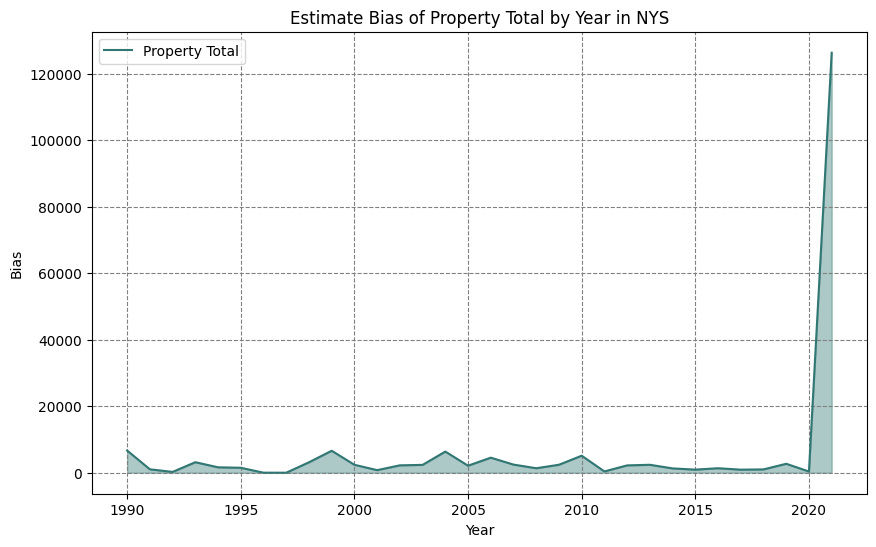

In [206]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.grid(color='gray', linestyle='--')

x = srsest_sub.index
y = srsest_sub['Property Total'].abs()

plt.plot(x, y, color='#317773', label='Property Total')

plt.fill_between(x, y, color='#317773', alpha=0.4, where=y>=0)

plt.legend()

plt.title('Estimate Bias of Property Total by Year in NYS')
plt.xlabel('Year')
plt.ylabel('Bias')

plt.show()

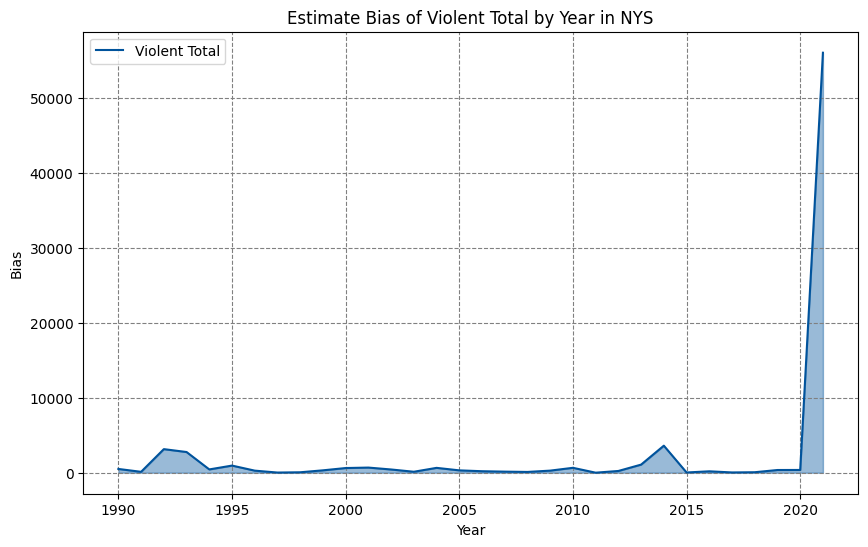

In [212]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.grid(color='gray', linestyle='--')

x = srsest_sub.index
y = srsest_sub['Violent Total'].abs()

plt.plot(x, y, color='#00539C', label='Violent Total')

plt.fill_between(x, y, color='#00539C', alpha=0.4, where=y>=0)

plt.legend()

plt.title('Estimate Bias of Violent Total by Year in NYS')
plt.xlabel('Year')
plt.ylabel('Bias')

plt.show()